In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [3]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [4]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [5]:
#Calculamos el numero total de la población "n"

Mexico['beds'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [6]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['beds'].max()
Min = Mexico['beds'].min()
Limites = [Min, Max]
Limites

[0.0, 6.0]

In [7]:
# Calculamos el rango R
R = Max - Min
R

6.0

In [8]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [9]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.38241817134564404

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [10]:
# Categorización de variables
intervalos = np.linspace (0, 6, 16)
intervalos

array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
       5.2, 5.6, 6. ])

In [11]:
# Creamos las categorías

categorias = [
    "Sin cama",
    "Espacio mínimo",
    "Espacio compacto",
    "Cama individual",
    "Cama semi-doble",
    "Cama doble",
    "Doble amplia",
    "Cama triple",
    "Triple amplia",
    "Cuádruple compacta",
    "Cuádruple estándar",
    "Familiar pequeña",
    "Familiar estándar",
    "Familiar grande",
    "Familiar extra grande"
]


In [12]:
# Creamos las ctegorias en la columna numerica
Mexico['beds'] = pd.cut ( x = Mexico ['beds'], bins = intervalos, labels = categorias )
Mexico['beds']

0        Espacio compacto
1         Cama semi-doble
2         Cama semi-doble
3        Espacio compacto
4        Espacio compacto
               ...       
26577     Cama semi-doble
26578    Espacio compacto
26579    Espacio compacto
26580    Espacio compacto
26581    Espacio compacto
Name: beds, Length: 26582, dtype: category
Categories (15, object): ['Sin cama' < 'Espacio mínimo' < 'Espacio compacto' < 'Cama individual' ... 'Familiar pequeña' < 'Familiar estándar' < 'Familiar grande' < 'Familiar extra grande']

In [13]:
table1 = freq_tbl(Mexico['beds'])
table1

,beds,frequency,percentage,cumulative_perc
0,Espacio compacto,11409,0.429200,0.436959
1,Cama semi-doble,9886,0.371906,0.815588
2,Cama triple,2834,0.106613,0.924129
3,Cuádruple compacta,1285,0.048341,0.973344
4,Familiar estándar,449,0.016891,0.990540
5,Familiar extra grande,247,0.009292,1.000000
6,Sin cama,0,0.000000,1.000000
7,Espacio mínimo,0,0.000000,1.000000
8,Cama individual,0,0.000000,1.000000
9,Cama doble,0,0.000000,1.000000


In [14]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,beds,frequency
0,Espacio compacto,11409
1,Cama semi-doble,9886
2,Cama triple,2834
3,Cuádruple compacta,1285
4,Familiar estándar,449
5,Familiar extra grande,247
6,Sin cama,0
7,Espacio mínimo,0
8,Cama individual,0
9,Cama doble,0


In [15]:
# Obtener un filtro de los valores más relevantes de las vaiables categóricas seleccionadas

Filtro = table2[ table2['frequency'] > 0]
Filtro

,beds,frequency
0,Espacio compacto,11409
1,Cama semi-doble,9886
2,Cama triple,2834
3,Cuádruple compacta,1285
4,Familiar estándar,449
5,Familiar extra grande,247


In [16]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('beds')
Filtro_index

,frequency
beds,
Espacio compacto,11409
Cama semi-doble,9886
Cama triple,2834
Cuádruple compacta,1285
Familiar estándar,449
Familiar extra grande,247


<Axes: xlabel='beds'>

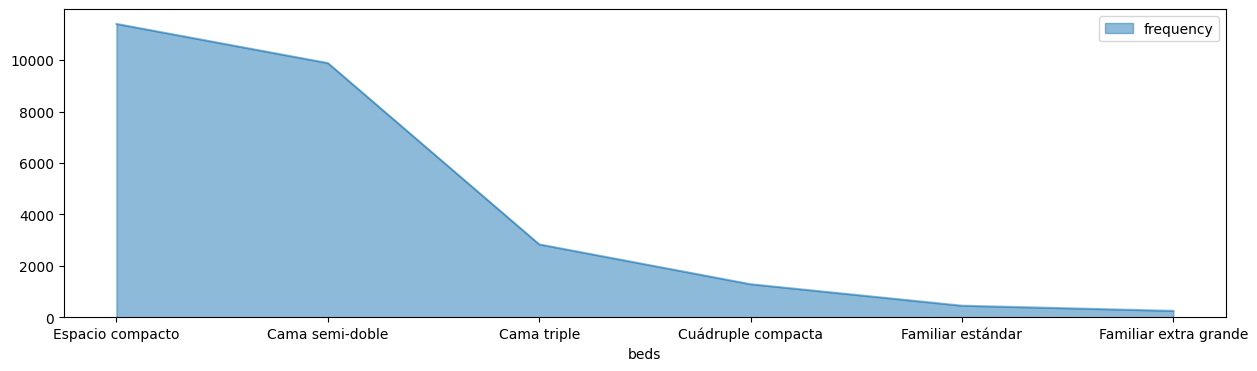

In [17]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (15,4), alpha = 0.5)